In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
best = pd.read_csv('data/adapt_best.csv')
best

,size,pin,threads,runtime,usertime,energy
0,800,True,4,0.451315,1.795780,11.785401
1,800,False,4,0.450225,1.794359,11.736768
2,800,True,5,0.436978,2.165153,11.740464
3,800,False,5,0.370513,1.795403,10.921902
4,800,True,6,0.417530,2.483480,11.157296
5,800,False,6,0.306552,1.795856,10.211592
6,800,True,7,0.399142,2.775510,10.921459
7,800,False,7,0.260892,1.796298,9.598880
8,800,True,8,0.387168,3.052568,10.582734
9,800,False,8,0.226980,1.799347,9.242088


In [31]:
optimum = {}

for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin)] = best_row['threads']

print(optimum)

{(np.int64(800), np.False_): np.int64(16), (np.int64(800), np.True_): np.int64(16), (np.int64(850), np.False_): np.int64(16), (np.int64(850), np.True_): np.int64(16)}


In [27]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')
slow

,size,pin,threads,runtime,usertime,energy
0,800,False,16,0.197521,3.101942,8.618019
1,800,False,16,0.195275,3.072771,8.456888
2,800,False,16,0.196046,3.078128,8.502786
3,800,False,16,0.195469,3.078115,8.563943
4,800,False,16,0.196213,3.086668,8.581032
...,...,...,...,...,...,...
1995,800,True,8,0.386956,3.078175,11.207063
1996,800,True,8,0.393985,3.072875,11.285250
1997,800,True,8,0.386751,3.074511,11.195405
1998,800,True,8,0.386639,3.071402,11.158053


In [7]:
# TODO: partially estimated, do measurements to find exact values
def optimum(size, pin):
    if size == 500 and pin == True:
        return 15
    if size <= 1050:
        return 16
    if pin:
        return 8
    return 12

fast['optimum'] = fast.apply(lambda x: optimum(x['size'], x['pin']), axis=1)
slow['optimum'] = slow.apply(lambda x: optimum(x['size'], x['pin']), axis=1)

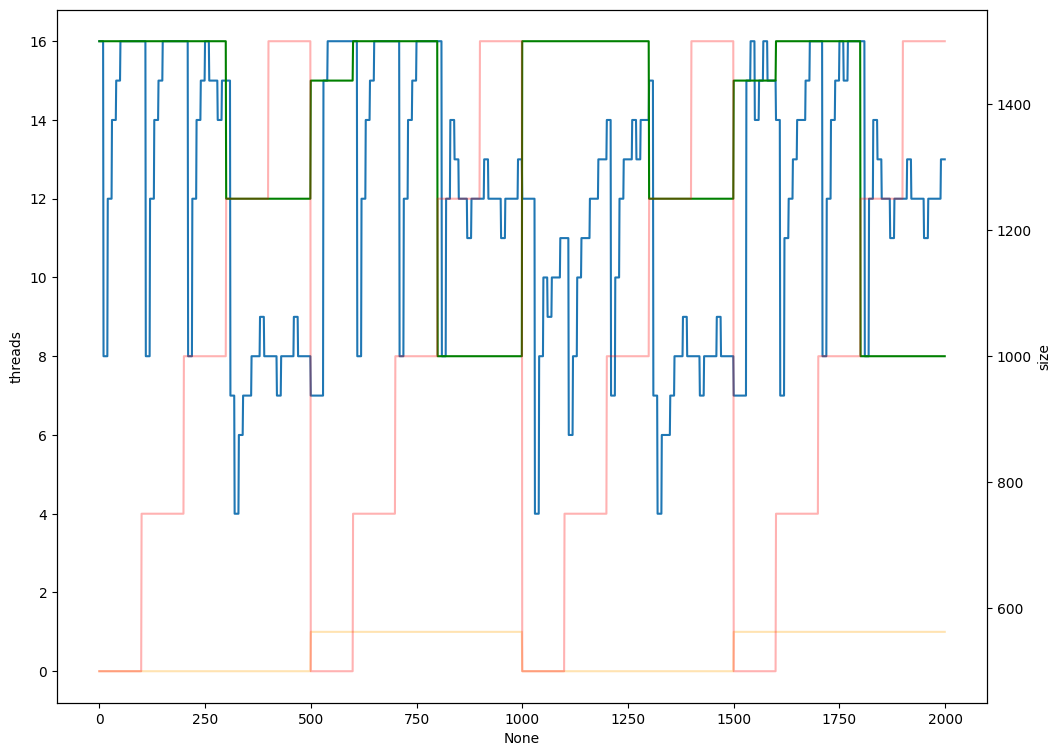

In [8]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(fast, x=fast.index, y='threads')
sns.lineplot(fast, x=fast.index, y='optimum', color='g', ax=ax)

sns.lineplot(fast, x=fast.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(fast, x=fast.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.savefig('images/adapt_fast.png')
plt.show()

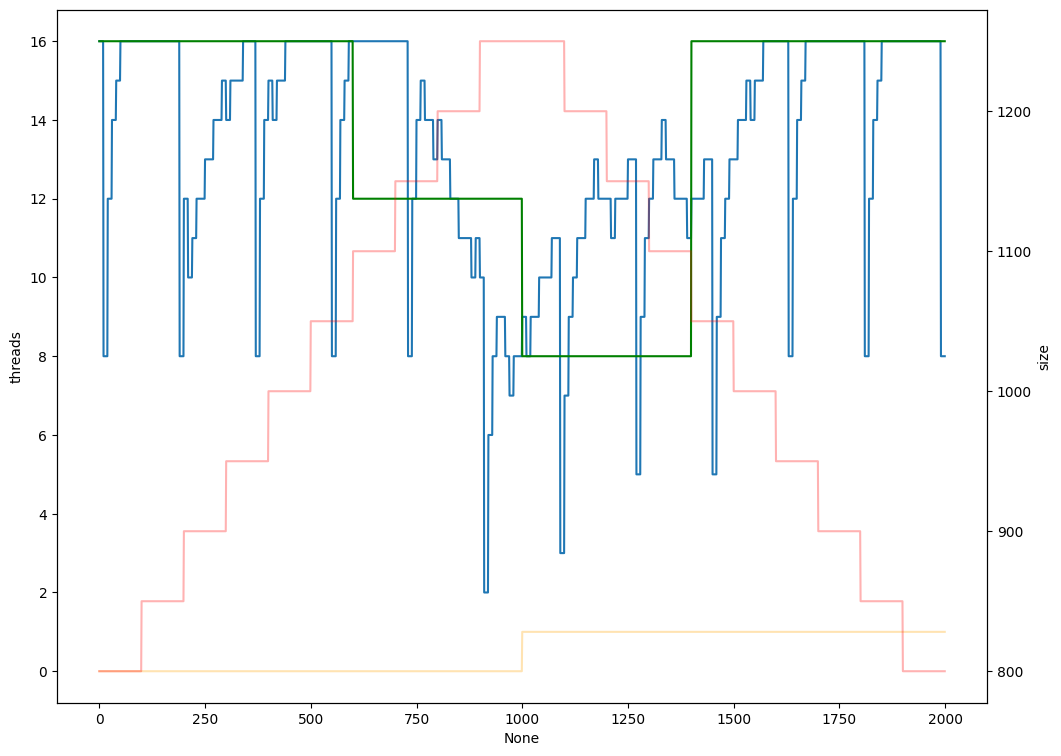

In [9]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(slow, x=slow.index, y='threads')
sns.lineplot(slow, x=slow.index, y='optimum', color='g', ax=ax)

sns.lineplot(slow, x=slow.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(slow, x=slow.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.savefig('images/adapt_slow.png')
plt.show()